import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
%cd D:\predictive_data_analysis

D:\predictive_data_analysis


1. Consider the data from the Federal Reserve Economic Database (FRED) which is 
accessible using the link, https://fred.stlouisfed.org/series/IPG2211A2N concerning the 
Industrial Production Index for Electricity and Gas Utilities from January 2000 to Jan
2023. Perform the following tasks.
a. Resample the series and choose an essential graph to visualise the month wise 
five number summary.
b. Enumerate the components of a time series. Also, isolate the components of the 
data series considering the additive and multiplicative models. 
[5] CO1 [K3]
2. Is the dataset used in Q.1 is stationary? If yes, justify. Otherwise, make the time series 
stationary. Also, using illustrative plots comment on why ARIMA model requires a 
time series to be stationary for forecasting.
[5] CO1 [K3]
PAGE 2 OF 2
3. The management of an organisation would like to know the worldwide online visitors 
browsing the pages and search engines of their website. The log entries of the users are 
stored in a .csv file 'Log_Reg_dataset.csv'. The dataset has various features like 
Country, Age, Repeat_Visitor, Search Engine, Web pages Viewed, and Status. Perform 
descriptive statistics of each feature using PySpark. Assign probability value 0 and 1 
for class 0 and class 1 respectively. Import the required machine learning packages in 
PySpark and fit a logistic regression model to predict the Status of the test dataset. 
Compute the confusion matrix and report your observation on the classification 
metrics.
[10] CO2 [K3]
4. Given the dataset “Superstore.xlsx”, forecast the sales of the category “Office 
Supplies” by performing the tasks given below.
a. Explore the dataset to report Stationarity using Rolling plots and Statistical 
Tests.
b. Determine the order of differencing, d.
c. Determine the order p for autoregressive process Αℛ(𝑝).
d. Determine the order q for moving averages 𝑀𝐴(𝑞).
e. Fit ARIMA (p, d, q) using Q.4.b, 4.c, and 4.d and report the results with 
accuracy metrics.

In [2]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is 56AD-6E33

 Directory of D:\predictive_data_analysis

06/10/2023  01:36 PM    <DIR>          .
06/10/2023  01:36 PM    <DIR>          ..
05/08/2023  03:39 PM            12,544 01-NumPy-Indexing-and-Selection.ipynb
05/08/2023  03:39 PM            11,622 02-NumPy-Operations.ipynb
05/09/2023  11:05 AM             4,440 09 May 2023- Load Data.ipynb
05/15/2023  03:28 PM             3,847 15 May 2023 Pandas-Exercises.ipynb
05/15/2023  03:21 PM            11,718 15 May 23 05-Operations.ipynb
05/16/2023  09:30 AM             8,772 15 May 23 DataFrames Practice Exercise .ipynb
05/15/2023  10:54 PM             3,386 15_may_2023.R
05/29/2023  11:32 AM             2,049 airline_passengers.csv
05/23/2023  02:47 PM            10,104 averages.xlsx
05/22/2023  12:58 PM             9,292 CONFUSION_MATRIX.xlsx
06/05/2023  11:20 AM             8,734 cruise_ship_info.csv
06/07/2023  11:18 AM           490,010 CSC620 CA1 Predictive Analytics.pdf
05/

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv("IPG2211A2N_2000_2023.csv",index_col=0,parse_dates=True)

In [7]:
df

,IPG2211A2N
DATE,
2000-01-01,100.9655
2000-02-01,93.1095
2000-03-01,87.0262
2000-04-01,80.4459
2000-05-01,83.4576
...,...
2022-12-01,119.2465
2023-01-01,116.1139
2023-02-01,106.4287


In [8]:
#a) Resample the data to monthly frequency ('M')
monthly_data = df.resample('M').mean()

# Calculate the five-number summary using describe()
summary = monthly_data.describe().loc[['min', '25%', '50%', '75%', 'max']]

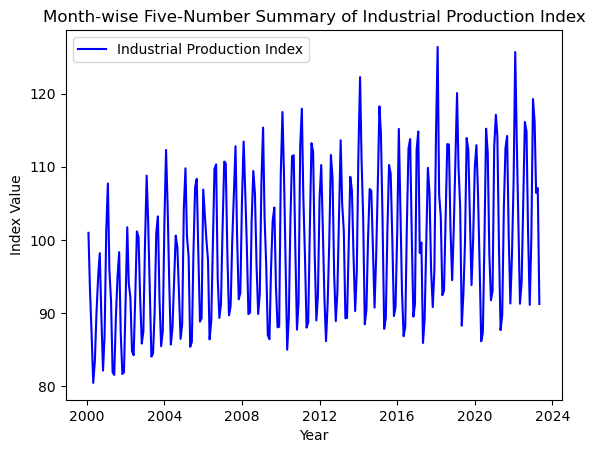

In [9]:
# Plotting the graph
fig, ax = plt.subplots()
ax.plot(monthly_data.index, monthly_data['IPG2211A2N'], color='blue', label='Industrial Production Index')
ax.set_xlabel('Year')
ax.set_ylabel('Index Value')
ax.set_title('Month-wise Five-Number Summary of Industrial Production Index')
ax.legend()

In [10]:
#calculate five summary of month wise 
summary

,IPG2211A2N
min,80.445900
25%,90.896775
50%,99.200200
75%,106.910850
max,126.373300


In [11]:
import seaborn as sns

In [12]:
df["Month"]=pd.DatetimeIndex(df.index).month

Text(0, 0.5, 'industrial production of electric and gas utilities')

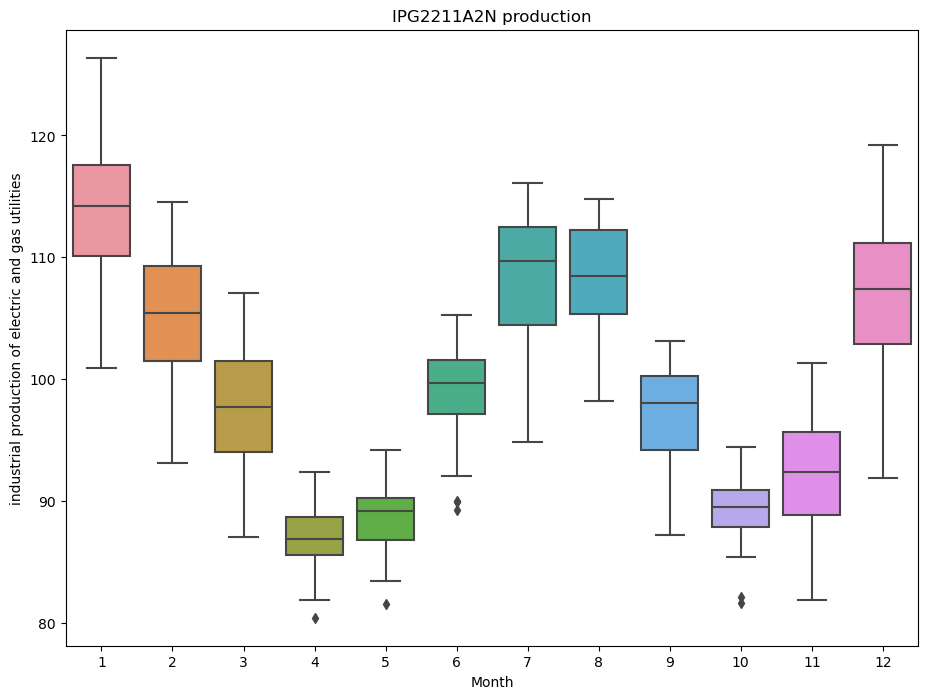

In [13]:
fig,ax=plt.subplots(figsize=(11,8))
sns.boxplot(data=df,x="Month",y="IPG2211A2N",ax=ax)
ax.set_title("IPG2211A2N production")
ax.set_ylabel("industrial production of electric and gas utilities")

In [14]:
plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

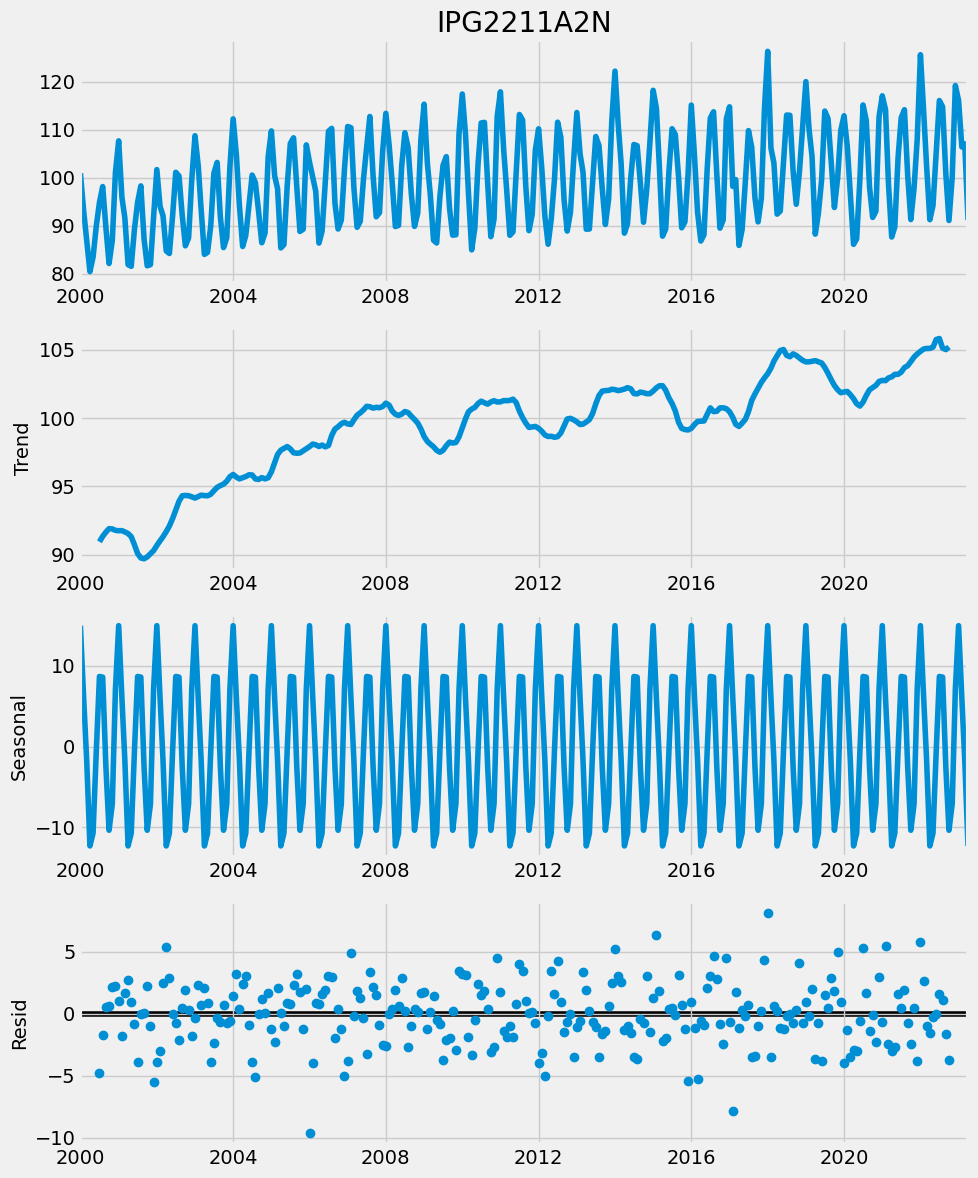

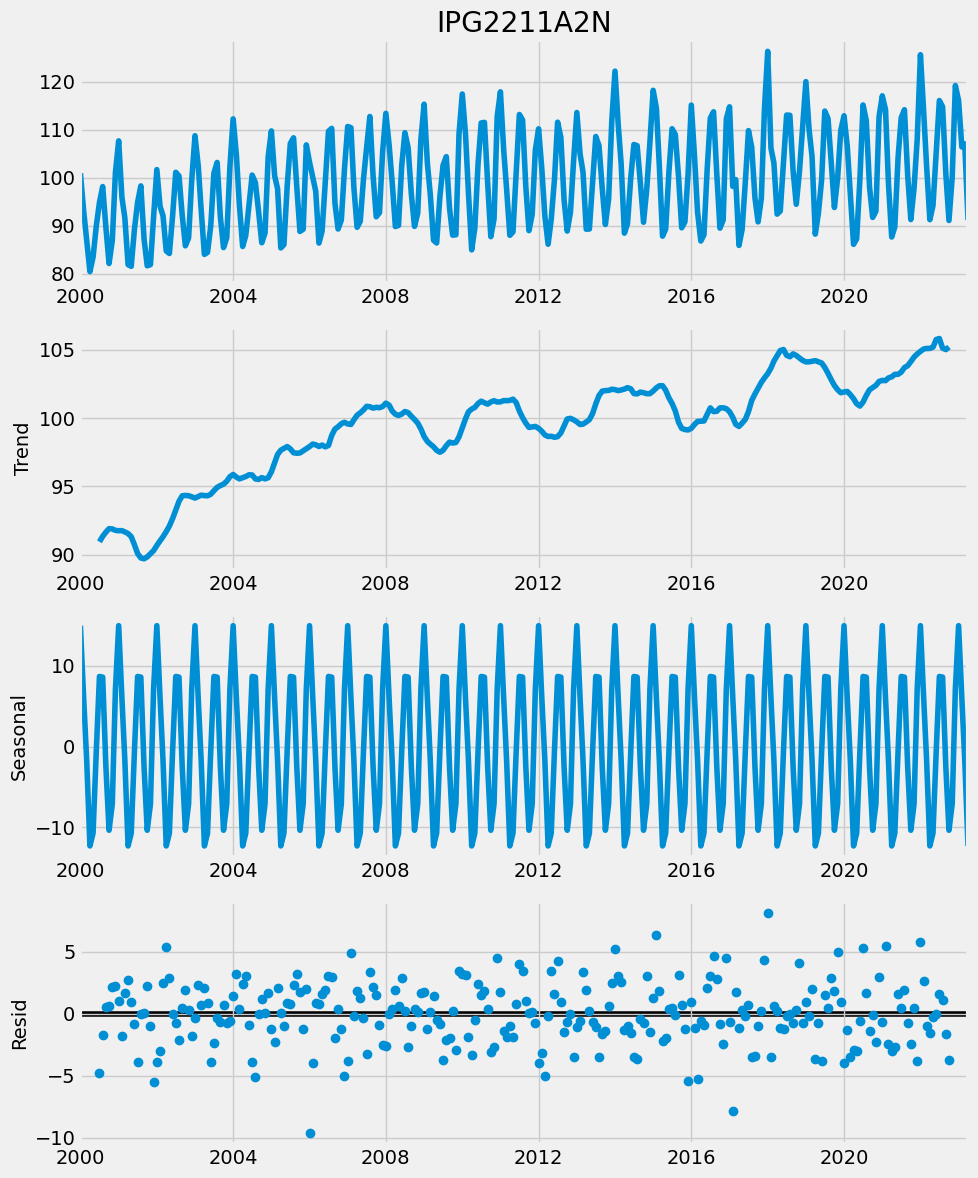

In [16]:
#b)enumerate the components of time series using additive and multiplicative time series analysis
rcParams["figure.figsize"]=10,12
result_additive=seasonal_decompose(df["IPG2211A2N"],model="additive")
result_additive.plot()

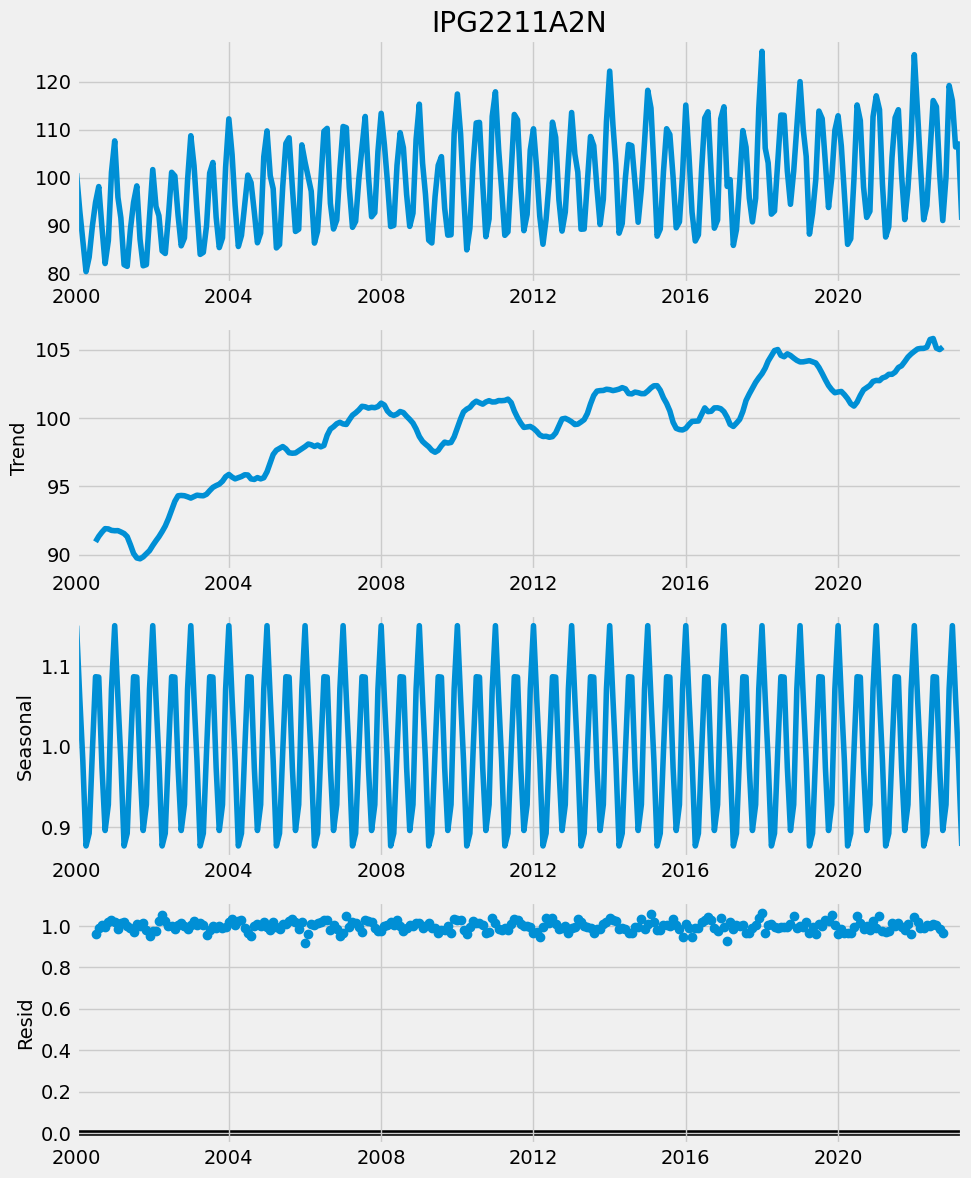

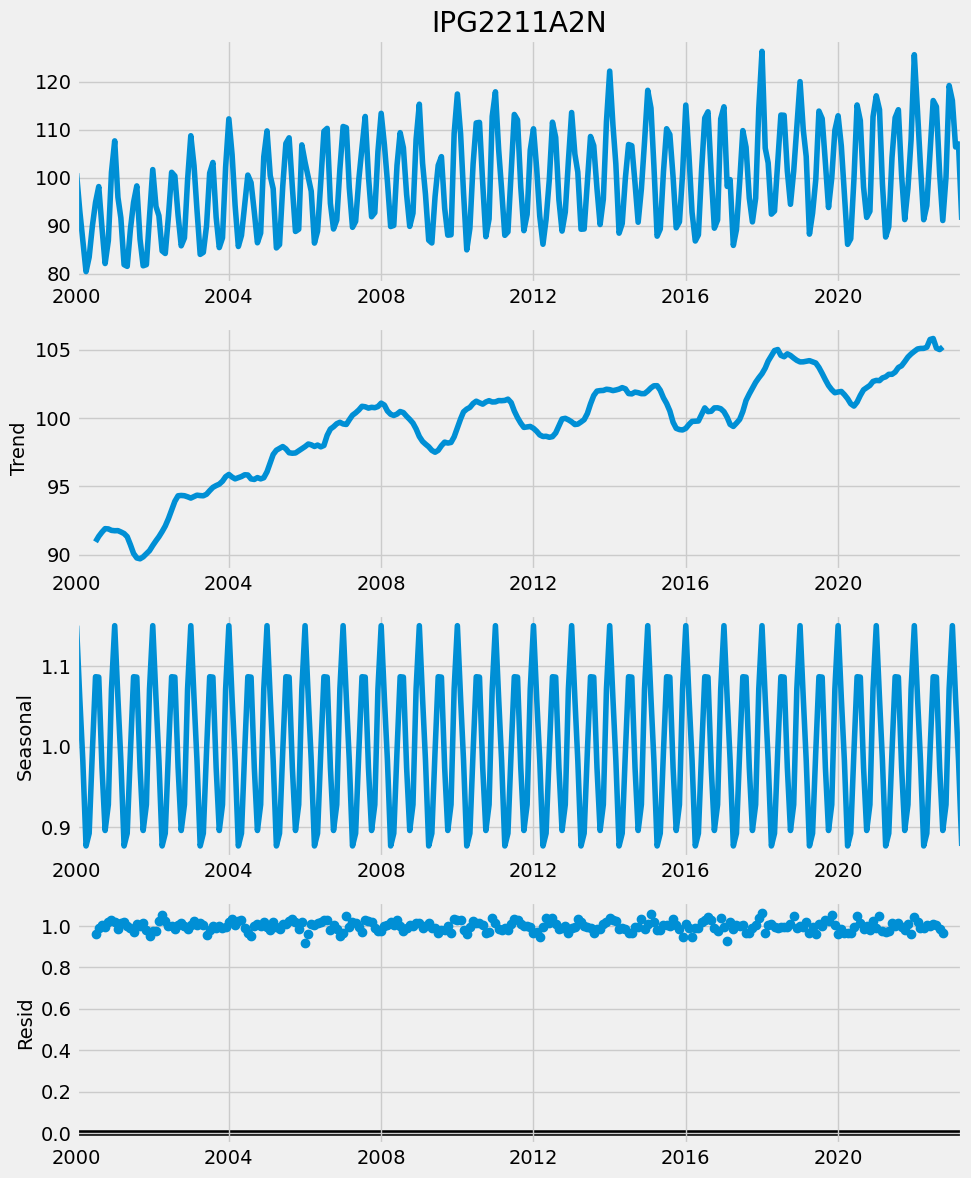

In [17]:
rcParams["figure.figsize"]=10,12
result_additive=seasonal_decompose(df["IPG2211A2N"],model="multiplicative")
result_additive.plot()

#2. Is the dataset used in Q.1 is stationary? If yes, justify. Otherwise, make the time series 
#stationary. Also, using illustrative plots comment on why ARIMA model requires a 
#time series to be stationary for forecasting.

Stationary test: Method 3: Augmented Dickey-Fuller test - (ADF) test
H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

HA: The time series is stationary.

If the p-value from the test is less than some significance level (e.g. α = .05), then we can reject the null hypothesis and conclude that the time series is stationary.

In [18]:
df['Year'] = pd.DatetimeIndex(df.index).year
df['Day Name'] = pd.DatetimeIndex(df.index).day_name()

In [19]:
df["Year"].nunique()

24

In [21]:
for year in np.unique(df.Year):
    X=df.loc[str(year)]["IPG2211A2N"].values
    result=adfuller(X)
    print("\n for the year:",year)
    print("ADF Statistic: %f"% result[0])
    print("p-value: %f" % result[1])
    for key,value in result[4].items():
        print("\t%5s: %8.3f" %(key,value))
X=df["IPG2211A2N"].values
result=adfuller(X)
print("\n for the consolidated 24 years")
print("ADF statistic %f" % result[0])
print("p-value %f" %result[1])
print("critical values")
for key,value in result[4].items():
    print("\t%5s %8.3f"%(key,value))


 for the year: 2000
ADF Statistic: -3.853598
p-value: 0.002404
	   1%:   -4.332
	   5%:   -3.233
	  10%:   -2.749

 for the year: 2001
ADF Statistic: -5.059764
p-value: 0.000017
	   1%:   -4.665
	   5%:   -3.367
	  10%:   -2.803

 for the year: 2002
ADF Statistic: -0.255859
p-value: 0.931527
	   1%:   -4.665
	   5%:   -3.367
	  10%:   -2.803

 for the year: 2003
ADF Statistic: -5.162039
p-value: 0.000011
	   1%:   -4.332
	   5%:   -3.233
	  10%:   -2.749

 for the year: 2004
ADF Statistic: -4.453947
p-value: 0.000238
	   1%:   -4.939
	   5%:   -3.478
	  10%:   -2.844

 for the year: 2005
ADF Statistic: 0.917802
p-value: 0.993318
	   1%:   -4.939
	   5%:   -3.478
	  10%:   -2.844

 for the year: 2006
ADF Statistic: -3.498827
p-value: 0.008017
	   1%:   -4.473
	   5%:   -3.290
	  10%:   -2.772

 for the year: 2007
ADF Statistic: -2.193382
p-value: 0.208656
	   1%:   -4.939
	   5%:   -3.478
	  10%:   -2.844

 for the year: 2008
ADF Statistic: -8.769107
p-value: 0.000000
	   1%:   -4.939


from the consolidated 24
years of data the p-value is more than 0.05 so it is  stationary

In [22]:
ts=monthly_data["IPG2211A2N"]

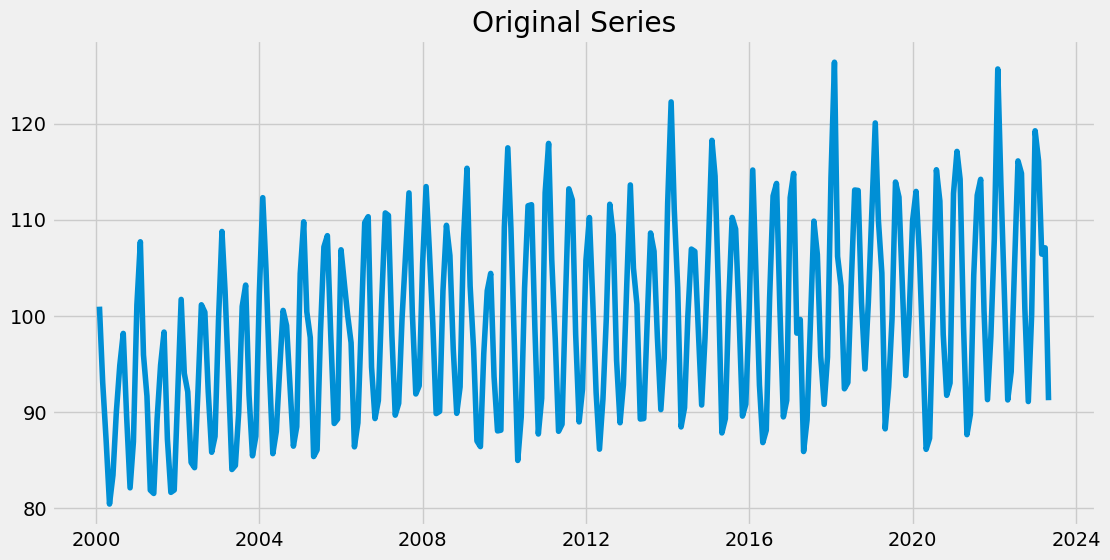

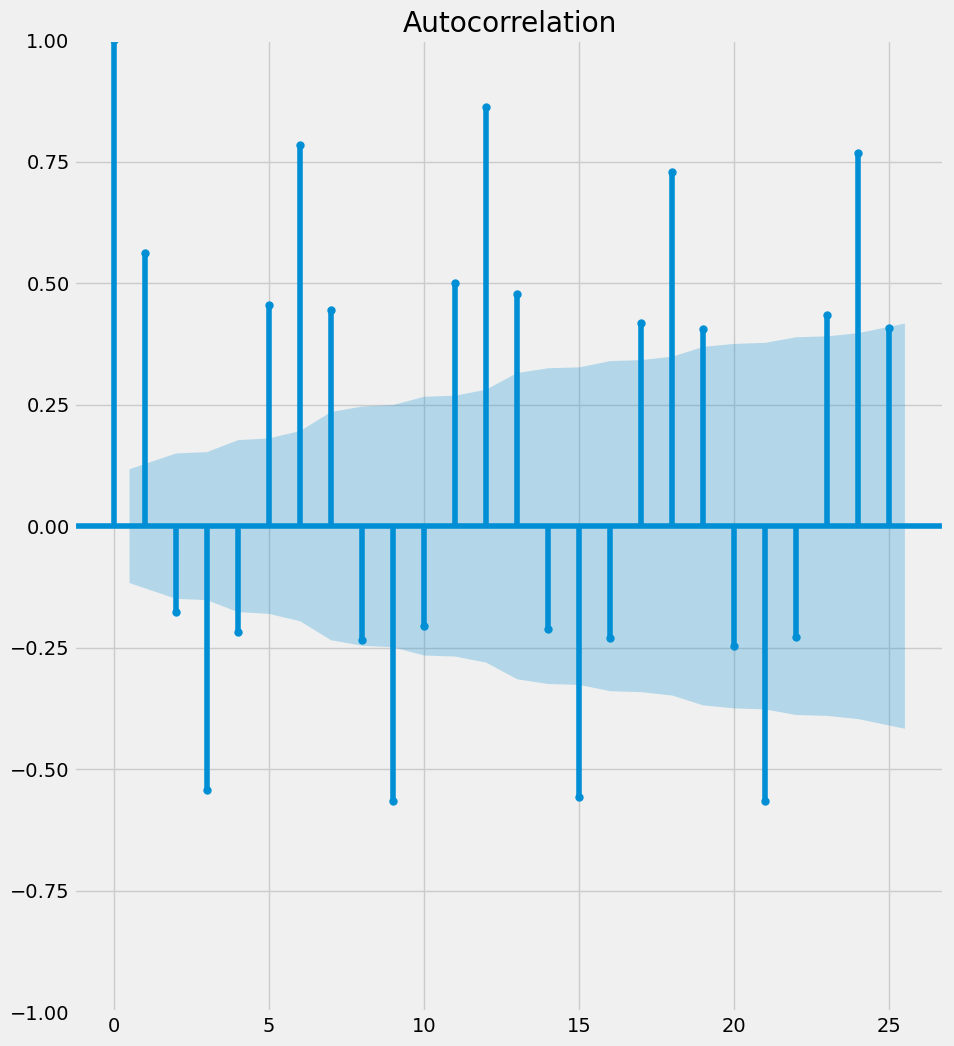

In [23]:
#Original Series
#fi, axes = plt.subplots(6,1, sharex = True
#fig, axes = plt. subplots(3,2, figsize = (11,8))
plt.figure(figsize=(12,6))

plt.plot(ts)
plt.title('Original Series')
acf0= plot_acf(ts)  #no differencing

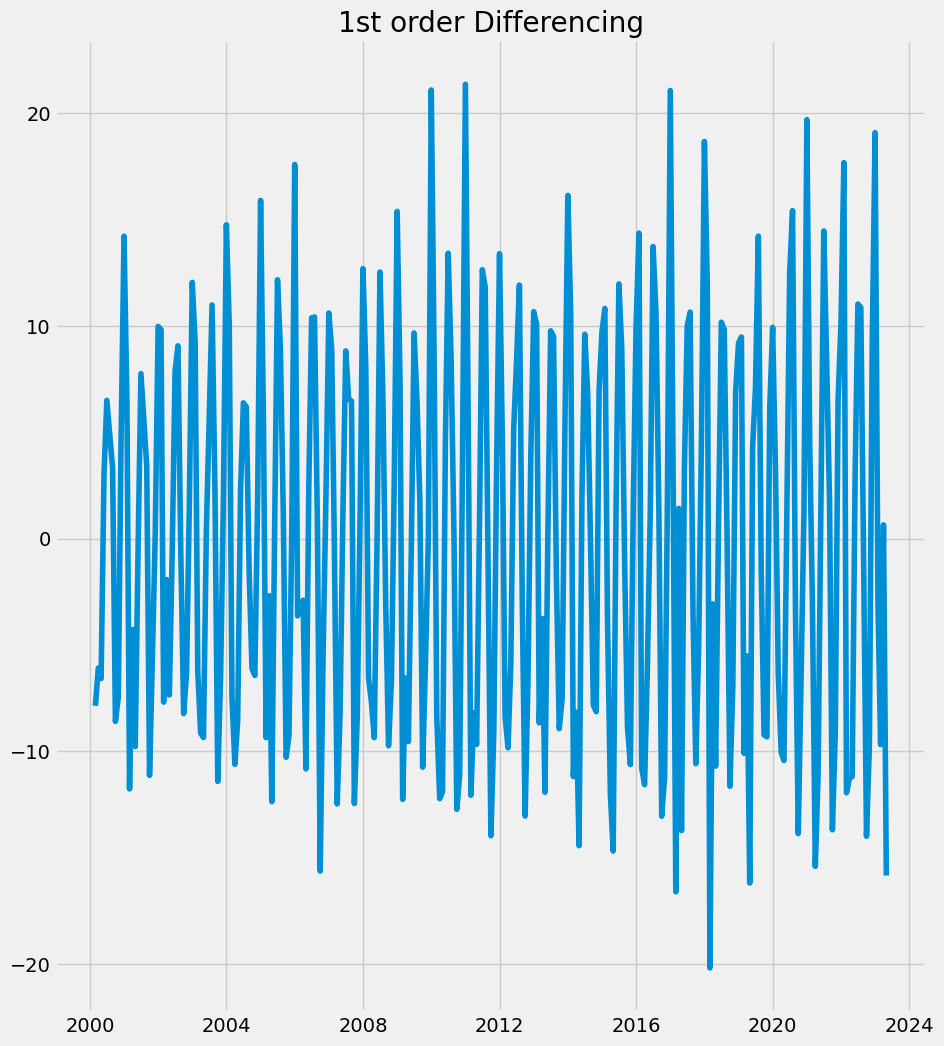

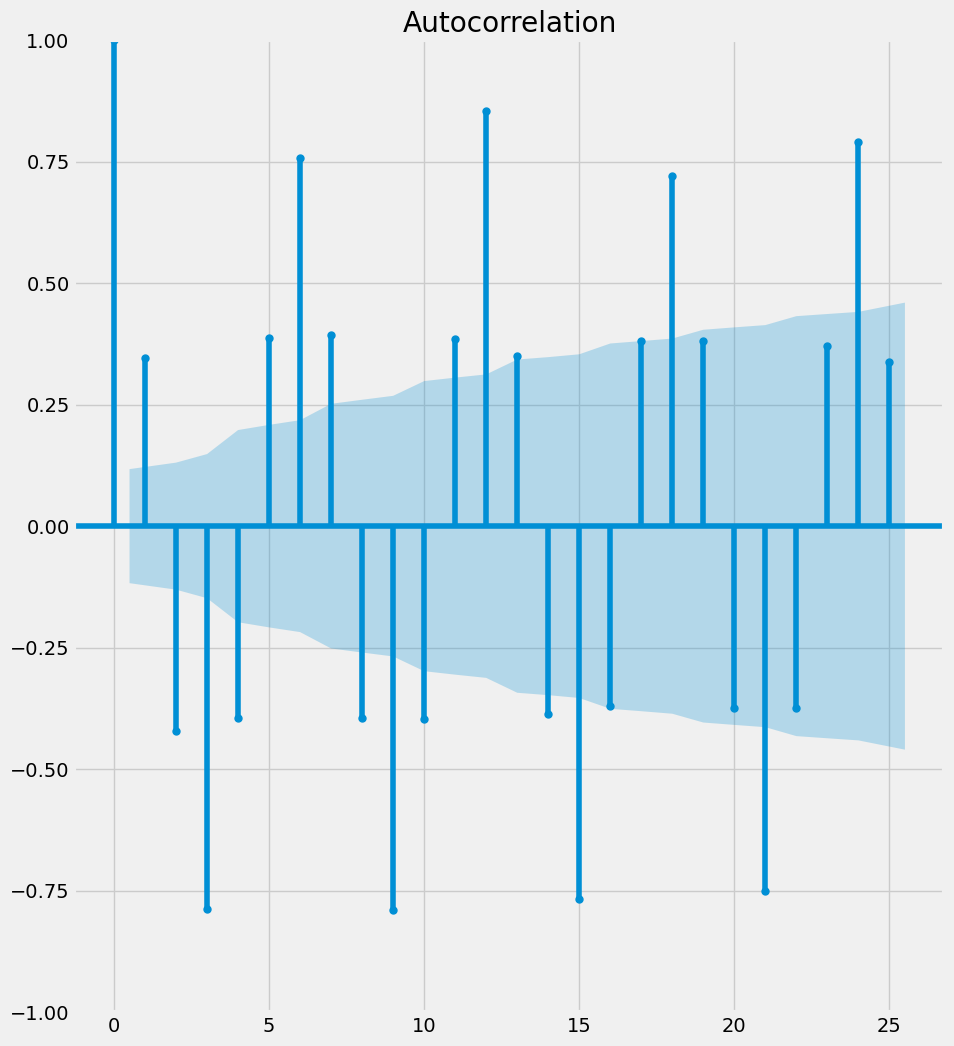

In [24]:

plt.plot(ts.diff());
plt.title("1st order Differencing")
acf1=plot_acf(ts.diff().dropna())

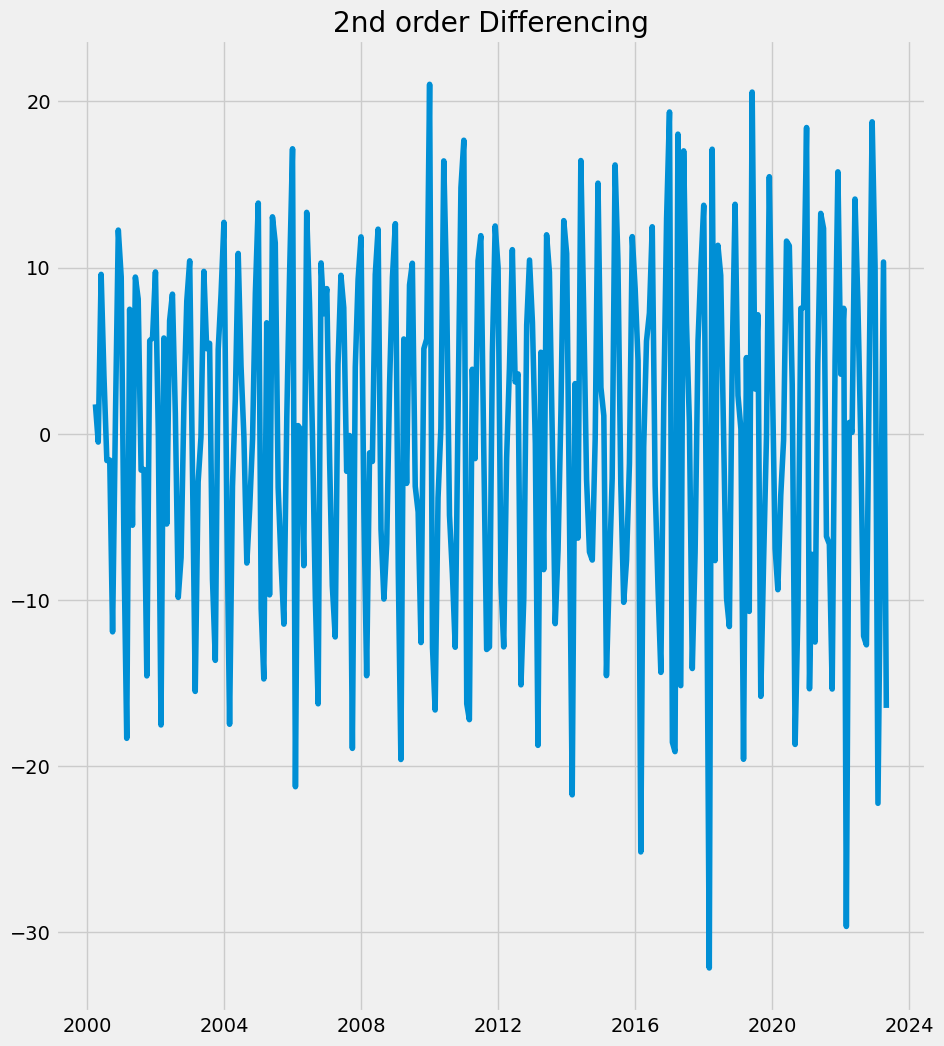

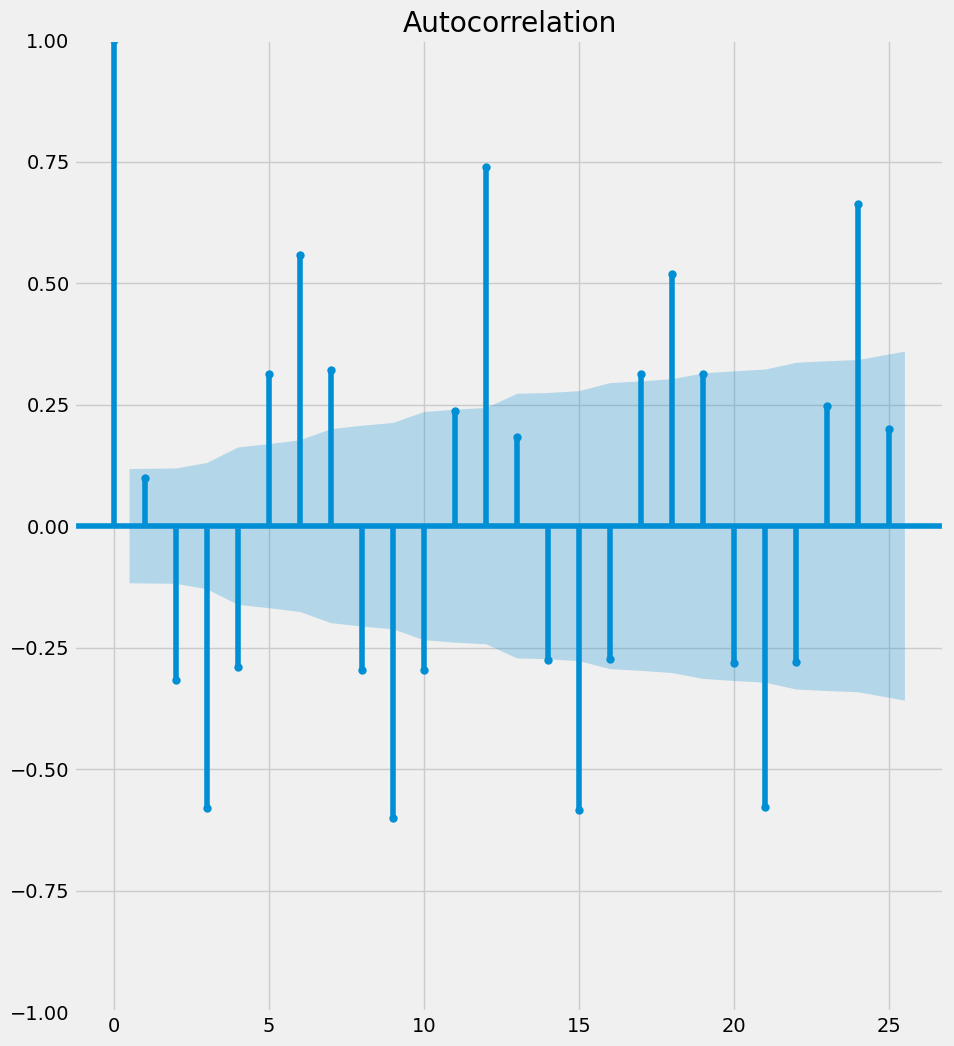

In [25]:
plt.plot(ts.diff().diff());
plt.title("2nd order Differencing")
acf1=plot_acf(ts.diff().diff().dropna())

 For instance, the widely used ARIMA (Auto-Regressive Integrated Moving Average) model for forecasting makes the assumption that the data is stationary. The model will not be able to faithfully reflect the underlying patterns in the data if it is non-stationary, and the findings will be erroneous.
As an illustration, a non-stationary time series could give the impression that there is a high connection between two variables, but in reality, the correlation is only there because of a trend or a seasonal element in the data.

How to make time series station

#3 )The management of an organisation would like to know the worldwide online visitors 
browsing the pages and search engines of their website. The log entries of the users are 
stored in a .csv file 'Log_Reg_dataset.csv'. The dataset has various features like 
Country, Age, Repeat_Visitor, Search Engine, Web pages Viewed, and Status. Perform 
descriptive statistics of each feature using PySpark. Assign probability value 0 and 1 
for class 0 and class 1 respectively. Import the required machine learning packages in 
PySpark and fit a logistic regression model to predict the Status of the test dataset. 
Compute the confusion matrix and report your observation on the classification 
metrics.

In [26]:
!pip install pyspark

Defaulting to user installation because normal site-packages is not writeable


In [30]:
import pyspark

In [31]:
from pyspark.sql import SparkSession

In [32]:
spark=SparkSession.builder.appName("Log_reg").getOrCreate()

In [33]:
data=spark.read.csv("Log_Reg_dataset.csv",inferSchema=True,header=True)

In [34]:
data.show()

+---------+---+--------------+--------+----------------+------+
|  Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|
+---------+---+--------------+--------+----------------+------+
|    India| 41|             1|   Yahoo|              21|     1|
|   Brazil| 28|             1|   Yahoo|               5|     0|
|   Brazil| 40|             0|  Google|               3|     0|
|Indonesia| 31|             1|    Bing|              15|     1|
| Malaysia| 32|             0|  Google|              15|     1|
|   Brazil| 32|             0|  Google|               3|     0|
|   Brazil| 32|             0|  Google|               6|     0|
|Indonesia| 27|             0|  Google|               9|     0|
|Indonesia| 32|             0|   Yahoo|               2|     0|
|Indonesia| 31|             1|    Bing|              16|     1|
| Malaysia| 27|             1|  Google|              21|     1|
|Indonesia| 29|             1|   Yahoo|               9|     1|
|Indonesia| 33|             1|   Yahoo| 

In [35]:
data.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Repeat_Visitor: integer (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Web_pages_viewed: integer (nullable = true)
 |-- Status: integer (nullable = true)



In [36]:
data.describe().show()

+-------+--------+-----------------+-----------------+--------+-----------------+------------------+
|summary| Country|              Age|   Repeat_Visitor|Platform| Web_pages_viewed|            Status|
+-------+--------+-----------------+-----------------+--------+-----------------+------------------+
|  count|   20000|            20000|            20000|   20000|            20000|             20000|
|   mean|    null|         28.53955|           0.5029|    null|           9.5533|               0.5|
| stddev|    null|7.888912950773227|0.500004090187782|    null|6.073903499824976|0.5000125004687693|
|    min|  Brazil|               17|                0|    Bing|                1|                 0|
|    max|Malaysia|              111|                1|   Yahoo|               29|                 1|
+-------+--------+-----------------+-----------------+--------+-----------------+------------------+



In [37]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [38]:
data.columns

['Country', 'Age', 'Repeat_Visitor', 'Platform', 'Web_pages_viewed', 'Status']

In [39]:
data.groupBy("Country").count().show()

+---------+-----+
|  Country|count|
+---------+-----+
| Malaysia| 1218|
|    India| 4018|
|Indonesia|12178|
|   Brazil| 2586|
+---------+-----+



In [41]:
data.groupBy("Status").count().show()

+------+-----+
|Status|count|
+------+-----+
|     1|10000|
|     0|10000|
+------+-----+



In [44]:
from pyspark.ml.feature import StringIndexer
search_engine_indexer=StringIndexer(inputCol="Status",outputCol="Status No")
fit=search_engine_indexer.fit(data)
data=fit.transform(data)

IllegalArgumentException: requirement failed: Output column Status No already exists.

In [45]:
from pyspark.ml.feature import OneHotEncoder

In [46]:
search_engine_encoder=OneHotEncoder(inputCol="Status No",outputCol="Status_vector")
search_engine_encoder.setDropLast(False)
fit=search_engine_encoder.fit(data)
data=fit.transform(data)

In [47]:
data.show(3,truncate=False)

+-------+---+--------------+--------+----------------+------+---------+-------------+
|Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Status No|Status_vector|
+-------+---+--------------+--------+----------------+------+---------+-------------+
|India  |41 |1             |Yahoo   |21              |1     |1.0      |(2,[1],[1.0])|
|Brazil |28 |1             |Yahoo   |5               |0     |0.0      |(2,[0],[1.0])|
|Brazil |40 |0             |Google  |3               |0     |0.0      |(2,[0],[1.0])|
+-------+---+--------------+--------+----------------+------+---------+-------------+
only showing top 3 rows



In [48]:
country_indexer=StringIndexer(inputCol="Country",outputCol="Country no")

In [49]:
fit=country_indexer.fit(data)
data=fit.transform(data)

In [50]:
country_encoder=OneHotEncoder(inputCol="Country no",outputCol="Country_encoder")
ohe=country_encoder.fit(data)
data=ohe.transform(data)

In [51]:
data.show(3,truncate=False)

+-------+---+--------------+--------+----------------+------+---------+-------------+----------+---------------+
|Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Status No|Status_vector|Country no|Country_encoder|
+-------+---+--------------+--------+----------------+------+---------+-------------+----------+---------------+
|India  |41 |1             |Yahoo   |21              |1     |1.0      |(2,[1],[1.0])|1.0       |(3,[1],[1.0])  |
|Brazil |28 |1             |Yahoo   |5               |0     |0.0      |(2,[0],[1.0])|2.0       |(3,[2],[1.0])  |
|Brazil |40 |0             |Google  |3               |0     |0.0      |(2,[0],[1.0])|2.0       |(3,[2],[1.0])  |
+-------+---+--------------+--------+----------------+------+---------+-------------+----------+---------------+
only showing top 3 rows



In [52]:
from pyspark.ml.feature import VectorAssembler

In [55]:
data_assembler=VectorAssembler(
    inputCols=["Status_vector","Country_encoder","Age","Repeat_Visitor","Web_pages_viewed"],outputCol="features")
data=data_assembler.transform(data)


In [56]:
data.select(["features","Status"])

DataFrame[features: vector, Status: int]

In [57]:
model_data=data.select(["features","Status"])

In [58]:
from pyspark.ml.classification import LogisticRegression

In [59]:
#split the data
training_data,test_data=model_data.randomSplit([0.80,0.20])

In [60]:
training_data.count()

16063

In [62]:
training_data.groupBy("Status").count().show()

+------+-----+
|Status|count|
+------+-----+
|     1| 8049|
|     0| 8014|
+------+-----+



In [63]:
test_data.count()

3937

In [65]:
test_data.groupBy("Status").count().show()

+------+-----+
|Status|count|
+------+-----+
|     1| 1951|
|     0| 1986|
+------+-----+



In [69]:
log_reg = LogisticRegression(labelCol='Status').fit(training_data)
#log_reg is object to store the results of Logistic Regression()

In [70]:
#training results
train_results = log_reg.evaluate(training_data).predictions
#og_reg object has to call evaluate() to evaluate predictions by fitting the training data. 

In [71]:
train_results.filter(train_results['Status']==1).filter(train_results['prediction']==1).select(['Status','prediction','probability']).show(10,False)

+------+----------+------------------------------------------+
|Status|prediction|probability                               |
+------+----------+------------------------------------------+
|1     |1.0       |[4.9218685135796674E-8,0.9999999507813149]|
|1     |1.0       |[3.870370186612561E-8,0.9999999612962981] |
|1     |1.0       |[3.043511891152499E-8,0.9999999695648811] |
|1     |1.0       |[2.3933019759360494E-8,0.9999999760669802]|
|1     |1.0       |[2.3933019759360494E-8,0.9999999760669802]|
|1     |1.0       |[1.8820016299965162E-8,0.9999999811799837]|
|1     |1.0       |[1.8820016299965162E-8,0.9999999811799837]|
|1     |1.0       |[1.8820016299965162E-8,0.9999999811799837]|
|1     |1.0       |[1.8820016299965162E-8,0.9999999811799837]|
|1     |1.0       |[1.8820016299965162E-8,0.9999999811799837]|
+------+----------+------------------------------------------+
only showing top 10 rows



In [73]:
correct_preds = train_results.filter(train_results['Status']==1).filter(train_results['prediction']==1).count()

In [74]:
correct_preds

8049

In [75]:
#Test set results
results = log_reg.evaluate(test_data).predictions

In [76]:
results.select(['Status','prediction']).show(20,False)

+------+----------+
|Status|prediction|
+------+----------+
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
+------+----------+
only showing top 20 rows



In [77]:
results.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Status: integer (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [78]:
results[(results['Status']==1) & (results.prediction ==1)].count()

1951

In [79]:
#CONFUSION MATRIX
tp = results[(results['Status']==1)& (results.prediction==1)].count()
tn = results[(results['Status']==0)& (results.prediction==0)].count()
fp = results[(results['Status']==0)& (results.prediction==1)].count()
fn = results[(results['Status']==1)& (results.prediction==0)].count()

In [80]:
#precision
precision=tp/(tp+fp)
print("precision",precision)

precision 1.0


In [81]:
#recall
recall=tp/(tp+fn)
print("recall",recall)

recall 1.0


In [82]:
#accuracy
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("accuracy",accuracy)

accuracy 1.0


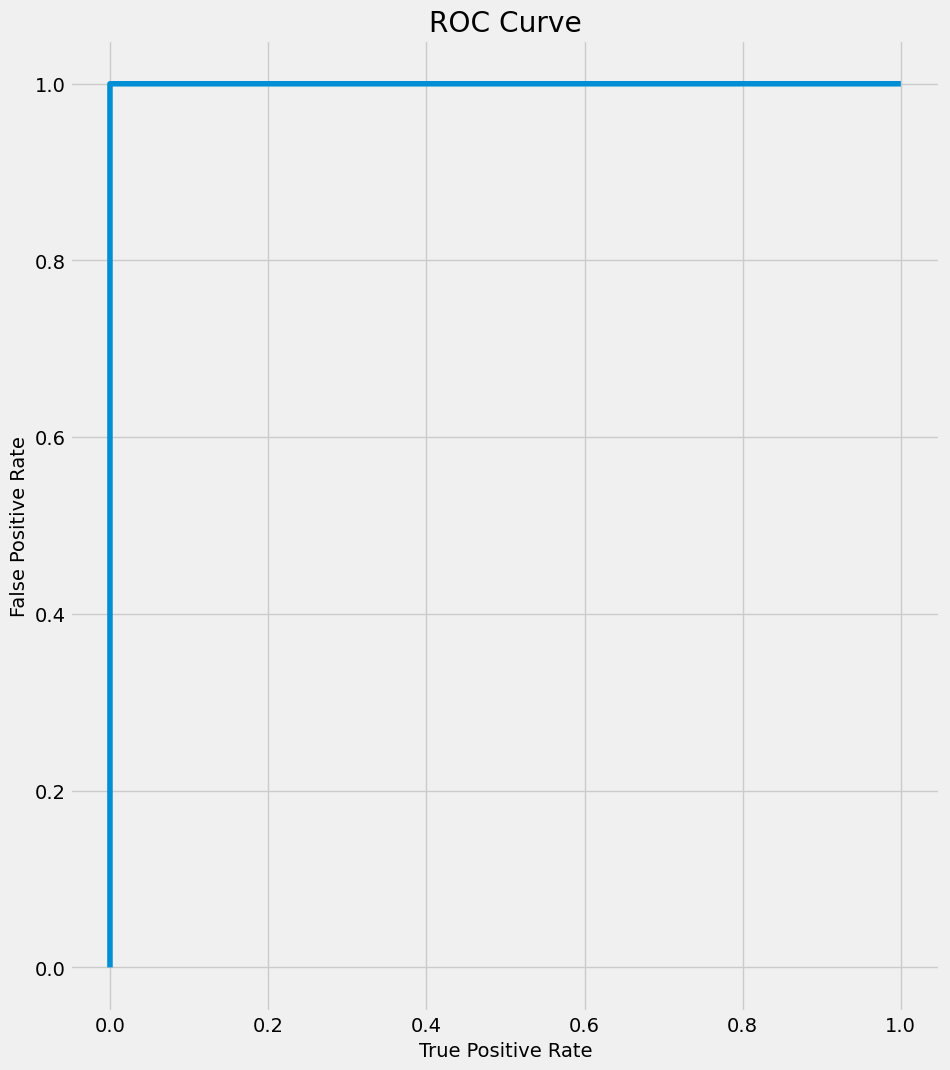

In [83]:
#Reciever operating characteristic
trainsummary = log_reg.summary #summay of model results
roc = trainsummary.roc.toPandas()  #transform to pandas formats
plt.plot(roc['FPR'],roc['TPR'])  #plot the false positive rate, true positive rate
plt.ylabel('False Positive Rate')
plt.xlabel("True Positive Rate")
plt.title('ROC Curve')
plt.show()

In [84]:
print('Training set area Under the curve (AUC): '+str(trainsummary.areaUnderROC))

Training set area Under the curve (AUC): 1.0


4)Given the dataset “Superstore.xlsx”, forecast the sales of the category “Office 
Supplies” by performing the tasks given below.
a. Explore the dataset to report Stationarity using Rolling plots and Statistical 
Tests.
b. Determine the order of differencing, d.
c. Determine the order p for autoregressive process Αℛ(𝑝).
d. Determine the order q for moving averages 𝑀𝐴(𝑞).
e. Fit ARIMA (p, d, q) using Q.4.b, 4.c, and 4.d and report the results with 
accuracy metrics.

In [2]:
%cd D:\predictive_data_analysis

D:\predictive_data_analysis


In [3]:
%ls

 Volume in drive D is New Volume
 Volume Serial Number is 56AD-6E33

 Directory of D:\predictive_data_analysis

06/07/2023  11:34 PM    <DIR>          .
06/07/2023  11:34 PM    <DIR>          ..
05/08/2023  03:39 PM            12,544 01-NumPy-Indexing-and-Selection.ipynb
05/08/2023  03:39 PM            11,622 02-NumPy-Operations.ipynb
05/09/2023  11:05 AM             4,440 09 May 2023- Load Data.ipynb
05/15/2023  03:28 PM             3,847 15 May 2023 Pandas-Exercises.ipynb
05/15/2023  03:21 PM            11,718 15 May 23 05-Operations.ipynb
05/16/2023  09:30 AM             8,772 15 May 23 DataFrames Practice Exercise .ipynb
05/15/2023  10:54 PM             3,386 15_may_2023.R
05/29/2023  11:32 AM             2,049 airline_passengers.csv
05/23/2023  02:47 PM            10,104 averages.xlsx
05/22/2023  12:58 PM             9,292 CONFUSION_MATRIX.xlsx
06/05/2023  11:20 AM             8,734 cruise_ship_info.csv
06/07/2023  11:18 AM           490,010 CSC620 CA1 Predictive Analytics.pdf
05/

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
store=pd.read_excel("Superstore.xls")

In [6]:
store

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [7]:
store["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
#categories of sales data
store.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [9]:
store.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [10]:
ofs=store.loc[store["Category"]=="Office Supplies"]
ofs

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [11]:
ofs.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
#a)

In [12]:
#check if more than one sales data is there for a date
os=ofs.groupby('Order Date')["Sales"].size()

In [13]:
os

Order Date
2014-01-03     1
2014-01-04     3
2014-01-05     1
2014-01-06     6
2014-01-07     1
              ..
2017-12-26     4
2017-12-27     1
2017-12-28    12
2017-12-29     5
2017-12-30     5
Name: Sales, Length: 1148, dtype: int64

In [14]:
os[os>1].sort_values(ascending=False)

Order Date
2017-12-09    25
2016-11-10    25
2016-09-05    24
2017-12-02    22
2017-09-02    22
              ..
2017-06-27     2
2015-08-15     2
2017-07-02     2
2016-10-22     2
2017-03-07     2
Name: Sales, Length: 987, dtype: int64

In [15]:
#indexing with time series dataset
os=ofs.set_index("Order Date")

In [16]:
os

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
2014-06-09,7,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
2014-06-09,9,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
2014-06-09,10,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-22,9983,US-2016-157728,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
2015-05-17,9985,CA-2015-100251,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,New York,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
2015-05-17,9986,CA-2015-100251,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,New York,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240


<Axes: xlabel='Order Date'>

<Figure size 1600x600 with 0 Axes>

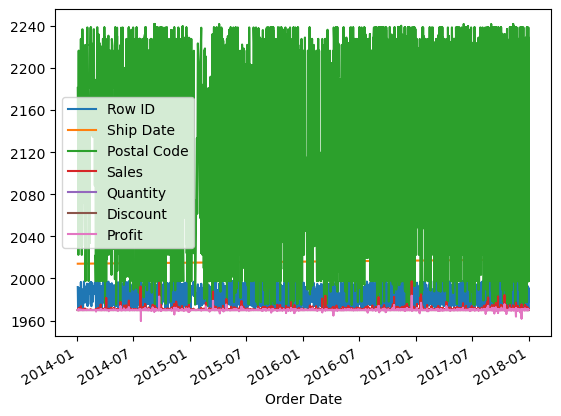

In [17]:
plt.figure(figsize=(16,6))
os.plot()

In [18]:
os["Year"]=pd.DatetimeIndex(os.index).year

In [19]:
os

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
Order Date,,,,,,,,,,,,,,,,,,,,,
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,2016
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,2015
2014-06-09,7,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,2014
2014-06-09,9,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,2014
2014-06-09,10,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-22,9983,US-2016-157728,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,...,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132,2016
2015-05-17,9985,CA-2015-100251,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,New York,...,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200,2015
2015-05-17,9986,CA-2015-100251,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,New York,...,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240,2015


In [20]:
os["Month"]=pd.DatetimeIndex(os.index).month
os["Day"]=pd.DatetimeIndex(os.index).day

<Axes: xlabel='Order Date'>

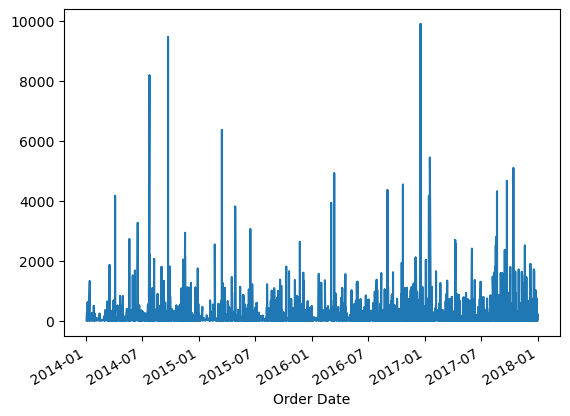

In [21]:
os["Sales"].plot()

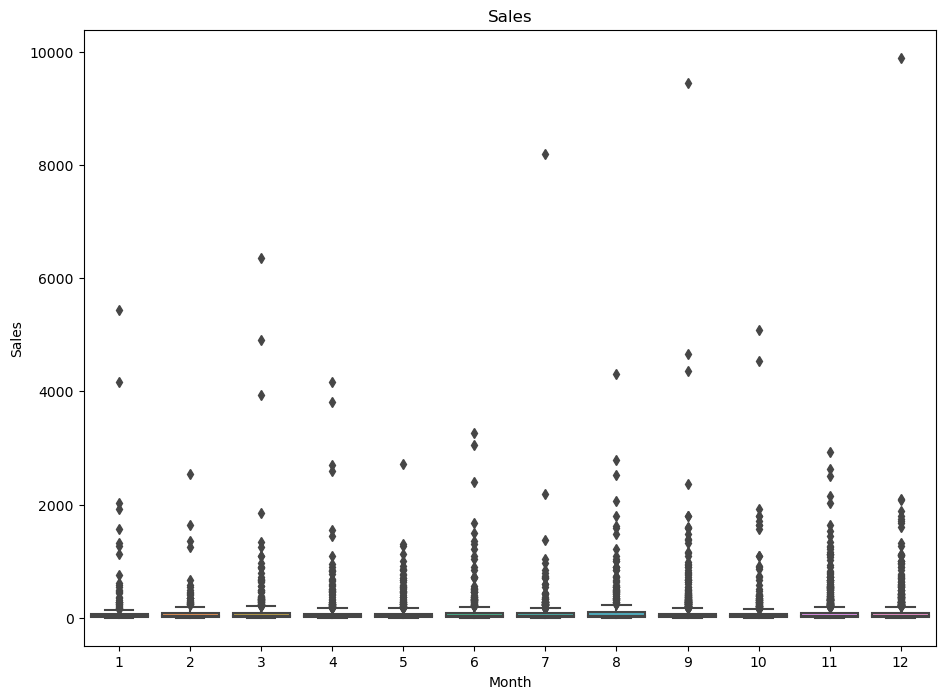

In [22]:
import seaborn as sns
#to check the seasoning it by month
fig,ax=plt.subplots(figsize=(11,8))
sns.boxplot(data=os,x="Month",y="Sales",ax=ax)
ax.set_title("Sales")
ax.set_label("Daily consolidated sales")

<Axes: xlabel='Order Date'>

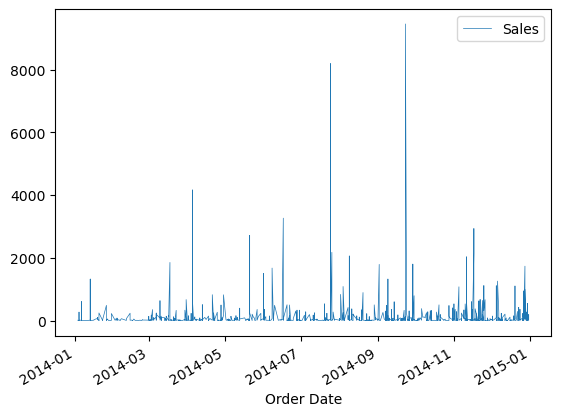

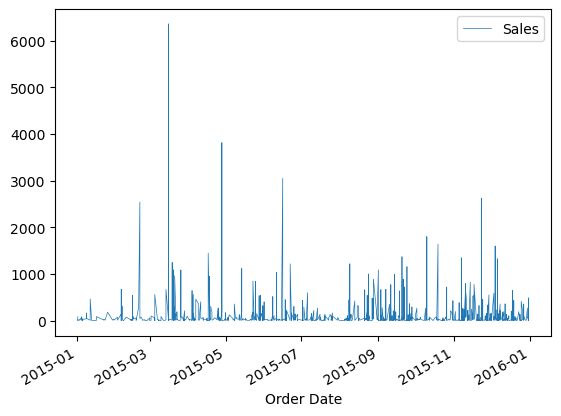

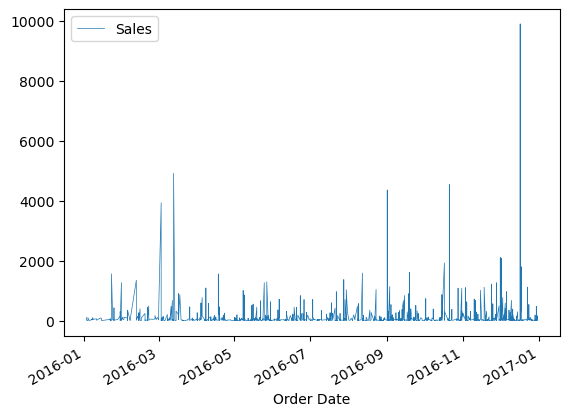

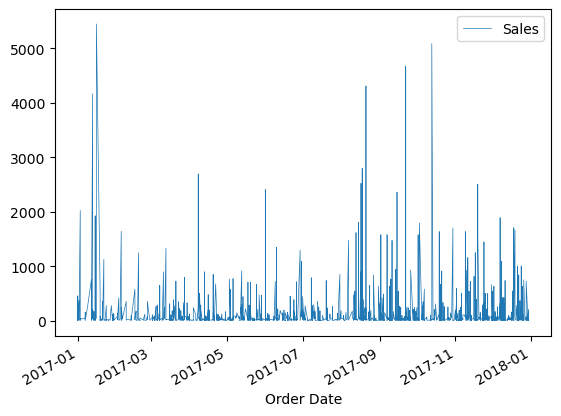

In [23]:
cols_plot=['Sales']
os.loc['2014'][cols_plot].plot(linewidth=0.5)
os.loc['2015'][cols_plot].plot(linewidth=0.5)
os.loc['2016'][cols_plot].plot(linewidth=0.5)
os.loc['2017'][cols_plot].plot(linewidth=0.5)

In [24]:
#monthly sales
data_columns=["Sales"]
os_week=os[data_columns].resample("W").sum()
os_week.head()

,Sales
Order Date,
2014-01-05,324.044
2014-01-12,708.004
2014-01-19,2337.764
2014-01-26,1143.170
2014-02-02,368.784


<Axes: xlabel='Order Date'>

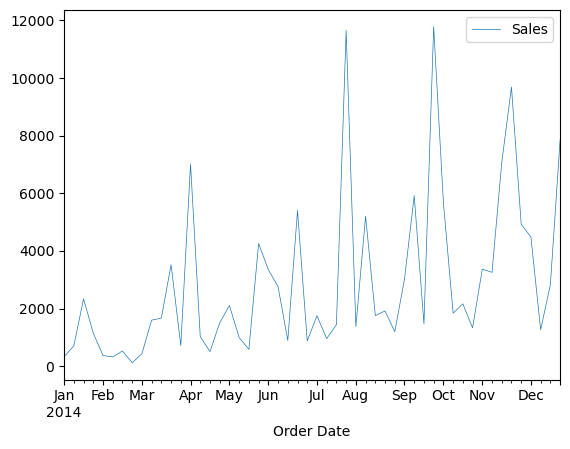

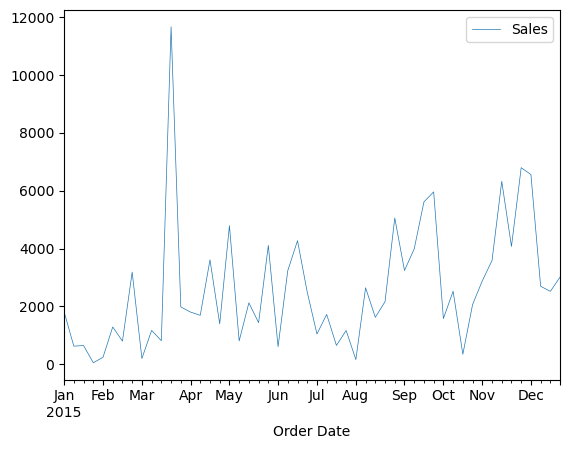

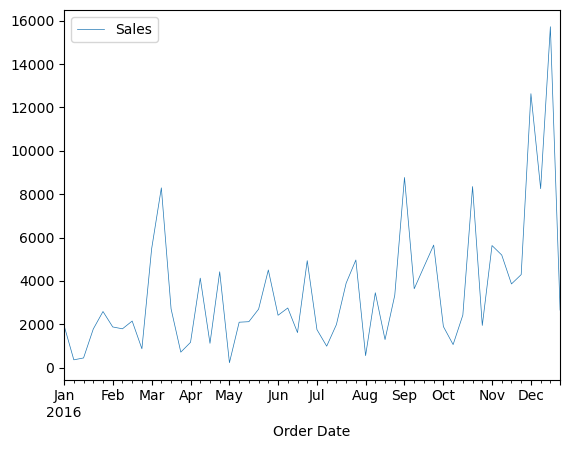

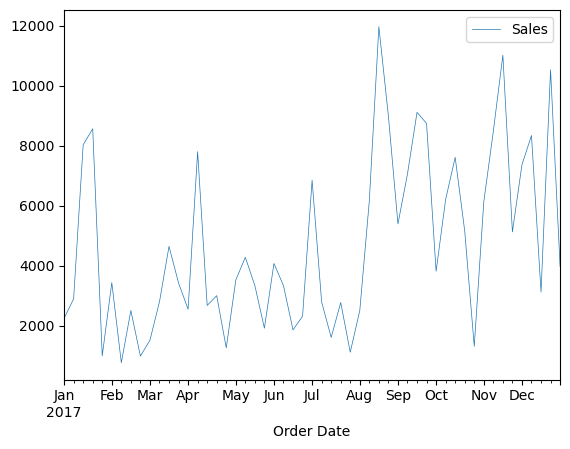

In [25]:
cols_plot=['Sales']
os_week.loc['2014'][cols_plot].plot(linewidth=0.5)
os_week.loc['2015'][cols_plot].plot(linewidth=0.5)
os_week.loc['2016'][cols_plot].plot(linewidth=0.5)
os_week.loc['2017'][cols_plot].plot(linewidth=0.5)

In [26]:
#monthly sales
data_colums=['Sales']
os_month=os[data_colums].resample('M').sum()
os_month.head()

,Sales
Order Date,
2014-01-31,4851.080
2014-02-28,1071.724
2014-03-31,8605.879
2014-04-30,11155.074
2014-05-31,7135.624


<Axes: xlabel='Order Date'>

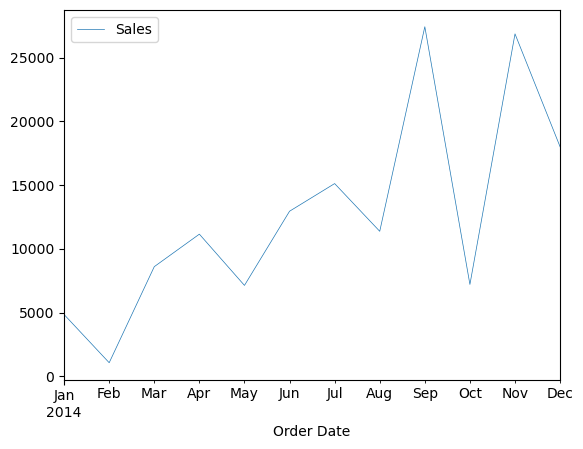

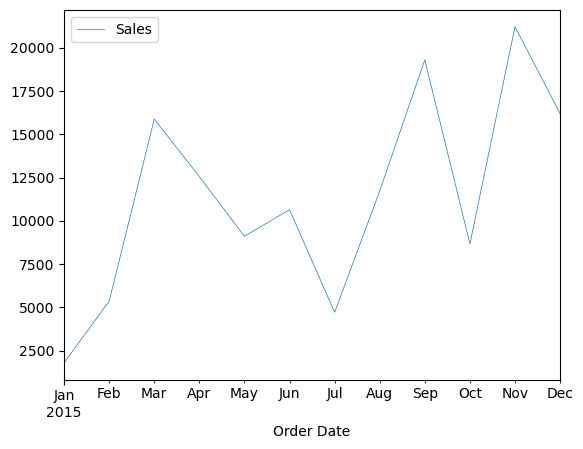

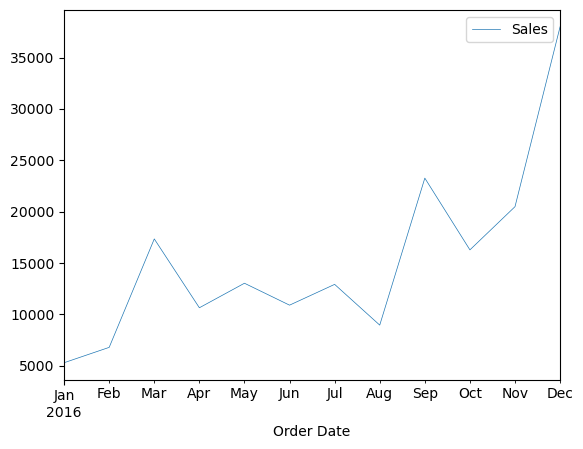

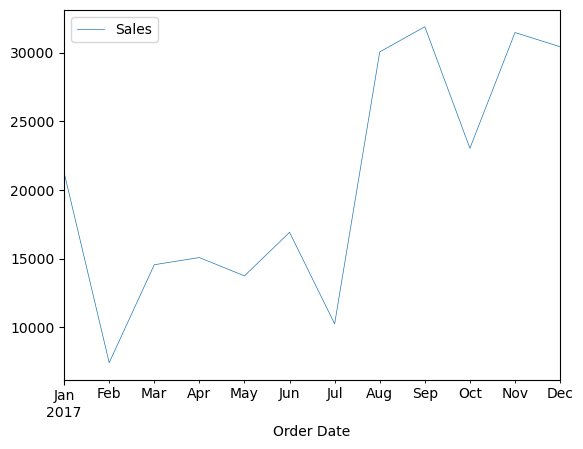

In [27]:
cols_plot=['Sales']
os_month.loc['2014'][cols_plot].plot(linewidth=0.5)
os_month.loc['2015'][cols_plot].plot(linewidth=0.5)
os_month.loc['2016'][cols_plot].plot(linewidth=0.5)
os_month.loc['2017'][cols_plot].plot(linewidth=0.5)

#Observation
every year there is a slight uptrend visible in month of jun_dec


In [28]:
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [29]:
for year in np.unique(os.Year):
    #detect_trend(data_grouped.loc[str(year)]['Sales'].values)

    X = os.loc[str(year)]['Sales'].values

    result = adfuller(X)
   
    print('\nFor the year : ', year)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%5s: %8.3f' % (key, value))

X = os['Sales'].values

result = adfuller(X)

print('\nFor the CONSOLIDATED 4 years')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%5s: %8.3f' % (key, value))


For the year :  2014
ADF Statistic: -34.597069
p-value: 0.000000
Critical Values:
	   1%:   -3.436
	   5%:   -2.864
	  10%:   -2.568

For the year :  2015
ADF Statistic: -34.945148
p-value: 0.000000
Critical Values:
	   1%:   -3.436
	   5%:   -2.864
	  10%:   -2.568

For the year :  2016
ADF Statistic: -40.063922
p-value: 0.000000
Critical Values:
	   1%:   -3.435
	   5%:   -2.863
	  10%:   -2.568

For the year :  2017
ADF Statistic: -43.904775
p-value: 0.000000
Critical Values:
	   1%:   -3.434
	   5%:   -2.863
	  10%:   -2.568

For the CONSOLIDATED 4 years
ADF Statistic: -77.718121
p-value: 0.000000
Critical Values:
	   1%:   -3.431
	   5%:   -2.862
	  10%:   -2.567


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


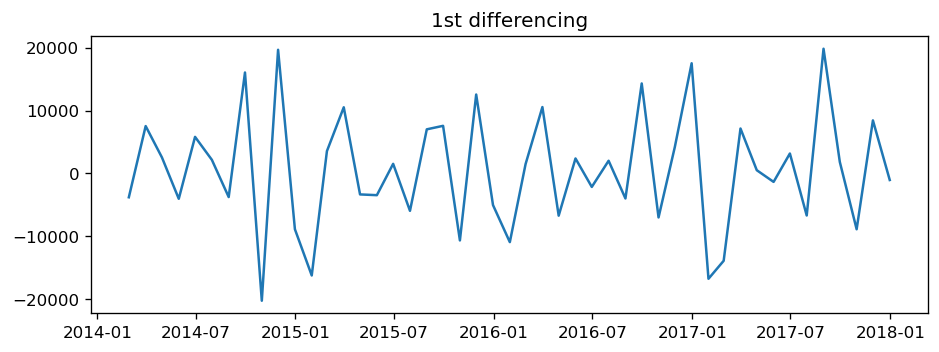

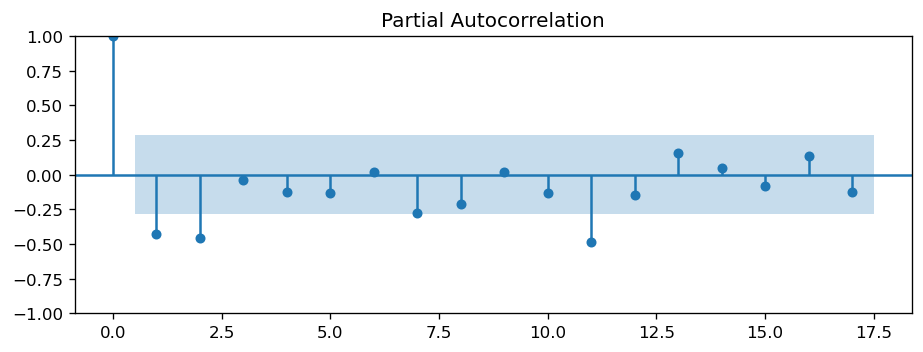

In [42]:
#find the order of AR term
#after differencing the TS we need to ensure there is no auto correlation in the differenced time series data
plt.rcParams.update({"figure.figsize":(9,3),"figure.dpi":120})
#fig,axes=plt.subplots(1,2,share=True)
plt.plot(os_month.diff())
plt.title("1st differencing")
#plt.set(ylim=(0,5))
pacf=plot_pacf(os_month.diff().dropna())

observation:In the above partial autocorrelation plot,we don't observe any significant spikes in lower order lags(a slight portion of spike lag into the negative zone)
    therefore we can be conservative and tentatively ix the p as 0(we can try with 1 later)

In [ ]:
#Order of the MA terms(q)
#fig,axes=plt.subplots(1,2,share=True)
plt.plot(os_month.diff())
plt.title("1st differencing")
#axes[1].set(ylim=(0,1.2))
acf=plot_acf(os_month.diff().dropna())

from the four consolidated the p-value is less than 0.05 t states that the data is not stationary

In [30]:
#b)b. Determine the order of differencing, d.
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

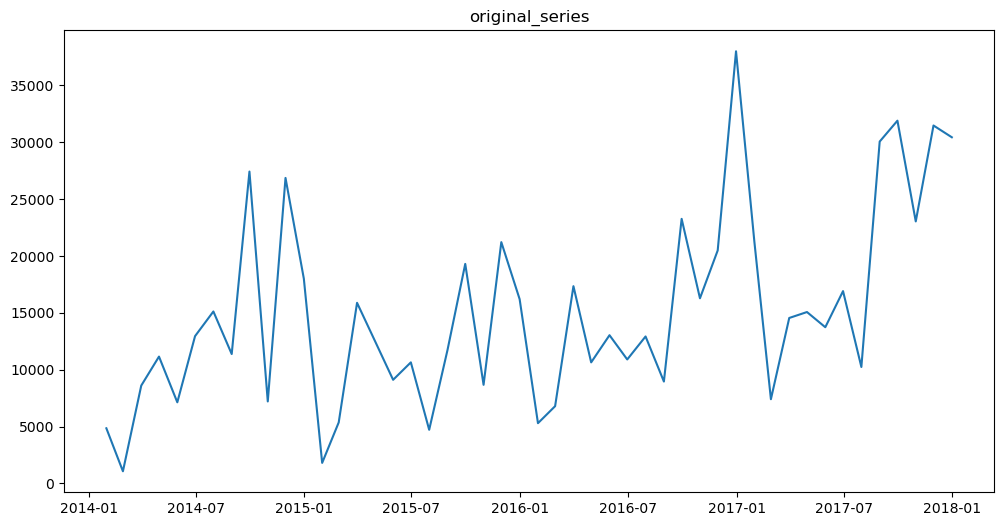

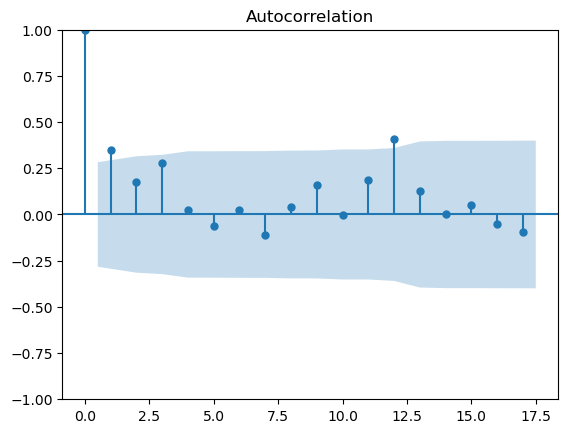

In [36]:
#original series
#fi,axes=plt.subplots(6,1,share=True)
#fig,axes=plt.subplots(3,2,figsize=(11,8))
plt.figure(figsize=(12,6))
plt.plot(os_month)
plt.title("original_series")
acf0=plot_acf(os_month)#no differencing

there is no significant spikes in plot_acf so we are doing 1st order differencing

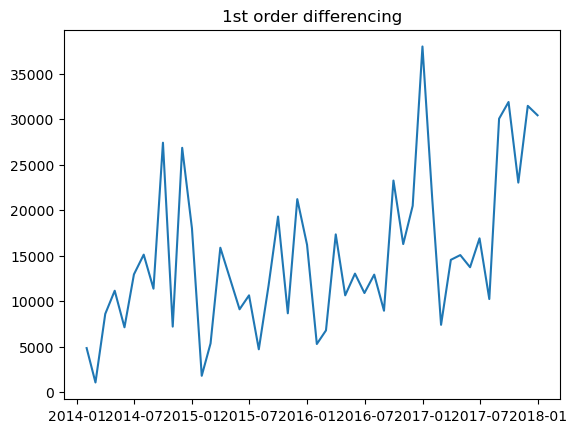

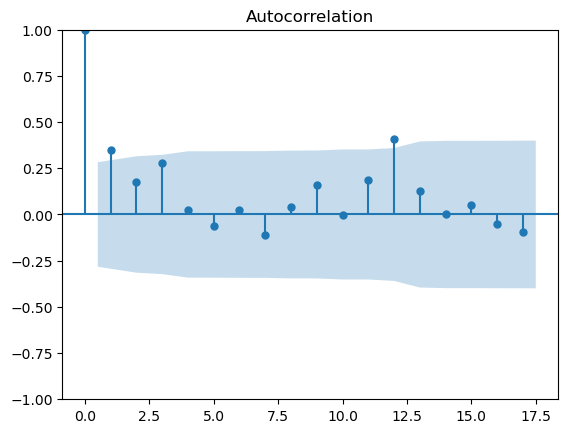

In [40]:
#1st order differencing
plt.plot(os_month)
plt.title("1st order differencing")
acf1=plot_acf(os_month.dropna())

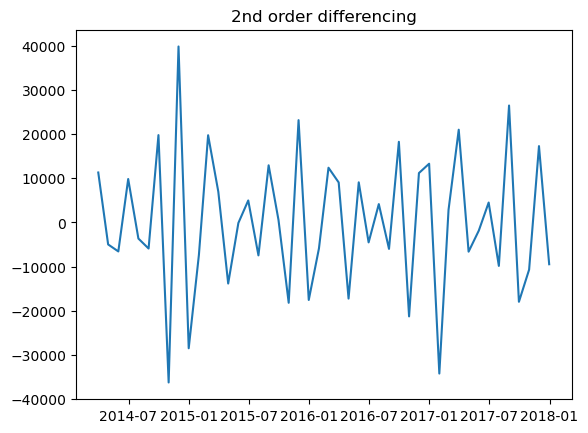

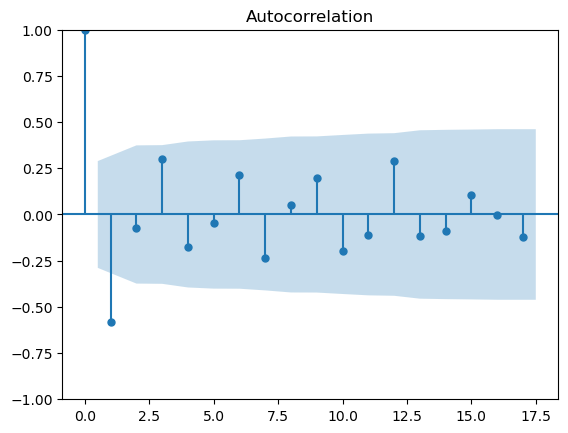

In [41]:
#2nd order differencing
plt.plot(os_month.diff().diff())
plt.title("2nd order differencing")
acf2=plot_acf(os_month.diff().diff().dropna())

#for the above series the time series reaches stationarity without any differencing
#look at the 2nd order differencing with a lag of 1, the ACF goes into negative zone,indicates the over differenced
#we can consider d=0 or d=1 or d=2

In [ ]:
#c)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


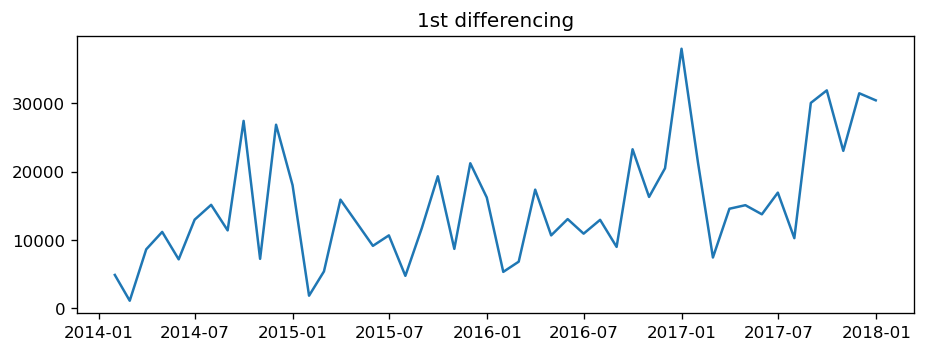

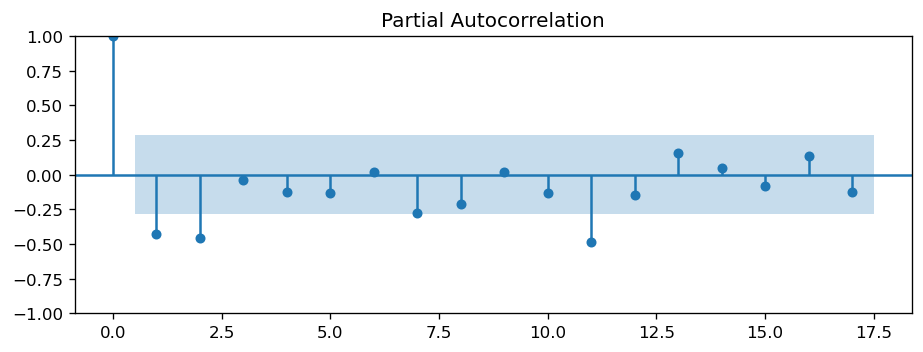

In [46]:
#find the order of the AR term
plt.rcParams.update({"figure.figsize":(9,3),"figure.dpi":120})
plt.plot(os_month)
plt.title("1st differencing")
pacf=plot_pacf(os_month.diff().dropna())

observation:in the above partial autocorrelation we don't observe any significant spikes in lower order lags
#therefore we can be conservative and tentatively fix the p as 0 (we can try with 1 later)    

In [ ]:
#d)

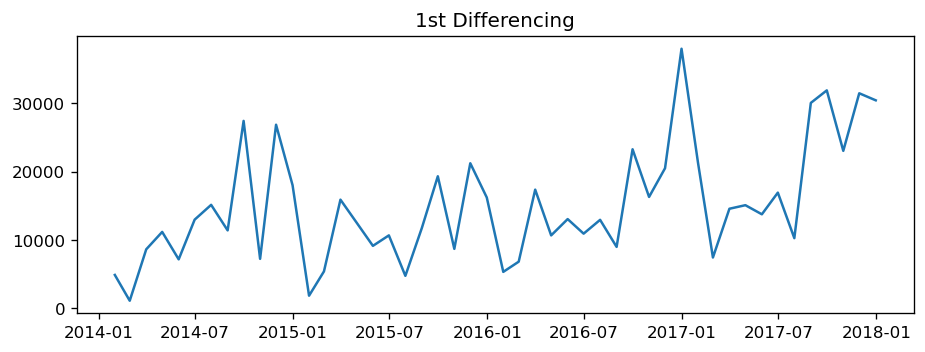

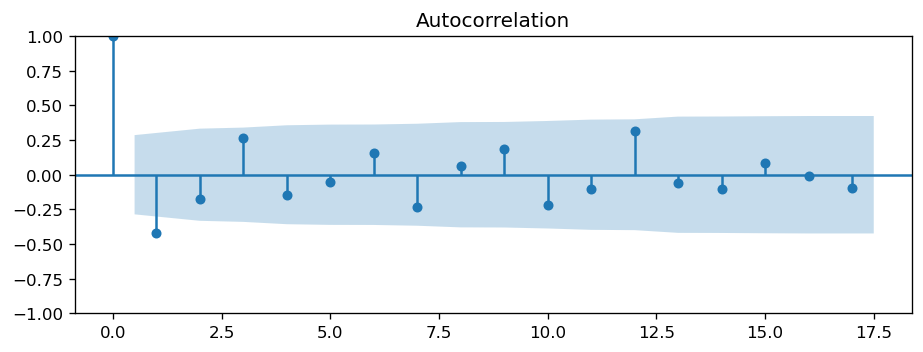

In [49]:
#find the order of the MA term(q):
plt.plot(os_month)
plt.title("1st Differencing")
acf=plot_acf(os_month.diff().dropna())

even with lag 1 the autocorrelation is going negative
lets tentatively fix q as 0

#S is seasonal arima :X stands for exogenous forecast(i.e with residues or errors)

In [ ]:
#e)

In [63]:
mod_default=sm.tsa.statespace.SARIMAX(os_month,order=(1,1,1),enfore_stationarity=False,enforce_invertibility=False)
results_default=mod_default.fit()

In [65]:
print(results_default.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -488.607
Date:                Fri, 09 Jun 2023   AIC                            983.214
Time:                        12:51:50   BIC                            988.764
Sample:                    01-31-2014   HQIC                           985.302
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1076      0.241      0.446      0.656      -0.365       0.580
ma.L1         -0.7615      0.132     -5.767      0.000      -1.020      -0.503
sigma2      7.146e+07   1.48e-10   4.84e+17      0.0

#from the above p-value the for ar.L1 is greater than 0.05 ,the ma.L1 model is less than 0.05 so ma.L1 model fits well 